In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:

x_train = pd.read_csv("train-en.csv", usecols = ['wind_speed48M'])

In [8]:
y_train = pd.read_csv("train-en.csv", usecols = ['Output'])

In [16]:
x_mean = x_train.mean()
print(x_mean)
x_var =  x_train.var()
print(x_var)
x_std = x_train.std()
print(x_std)
x_corr = x_train.corr()
print(x_corr)

wind_speed48M    5.626846
dtype: float64
wind_speed48M    6.085039
dtype: float64
wind_speed48M    2.466787
dtype: float64
               wind_speed48M
wind_speed48M            1.0


In [19]:
y_mean = y_train.mean()
print(y_mean)
y_var =  y_train.var()
print(y_var)
y_std = y_train.std()
print(y_std)
y_corr = y_train.corr()
print(y_corr)

Output    27293.661461
dtype: float64
Output    8.593003e+08
dtype: float64
Output    29313.824237
dtype: float64
        Output
Output     1.0


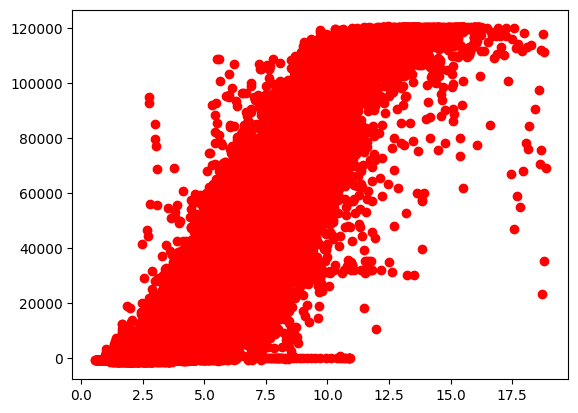

In [18]:
plt.scatter(x_train, y_train, color = "red")
#more work is needed to find outliers
#slacing or dbscan 

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
xtrain = np.array(x_train)
ytrain = np.array(y_train)

In [27]:
model.fit(xtrain, ytrain)
print(model.coef_)
print(model.intercept_)

[[10569.65727595]]
[-32180.17637606]


In [34]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
scores = model1.score(x_train, y_train)
x_test = pd.read_csv("eval-en.csv", usecols = ['wind_speed48M'])
prediction = model1.predict(x_test)

In [30]:
print(prediction)

[[57556.21389675]
 [56552.09645554]
 [55547.97901432]
 ...
 [20985.19972197]
 [20985.19972197]
 [20985.19972197]]


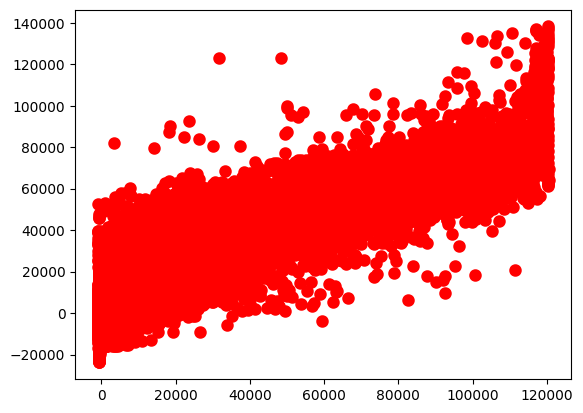

In [38]:
y_test = pd.read_csv("eval-en.csv", usecols = ['Output'])
plt.scatter(y_test, prediction, color = 'red', linewidth = 3)
plt.show()


In [41]:
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error, max_error, explained_variance_score
r2s =r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = median_absolute_error(y_test, prediction)
me = max_error(y_test, prediction)
ev= explained_variance_score(y_test, prediction)
print(f"r2 score = {r2s},  mean_squared_error = { mse}, median_absolute_error = {mae}, max_error = {me}, explained_variance_score = {ev}")

r2 score = 0.7639954710012078,  mean_squared_error = 250526557.06287342, median_absolute_error = 8780.674062017504, max_error = 91142.99928936214, explained_variance_score = 0.769442963922794


In [49]:
def predict_single(model,x_point):
    x = np.array(x_point)
    x = x.reshape(1, -1)
    y = model.predict(x)
    return y



In [50]:
predict_single(model1, 12)

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[94655.71093534]])